In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Midpoint formula</h1>

In [3]:
def midpoint_formula(a, b, f, m=1, fig=None, subplot=None, sol=None):
    # Size of the intervals
    H = (b - a) / m
    
    # Midpoints
    m_points = np.array([a + H/2 + i*H for i in range(m)])
    
    # Approximation of the integral
    I = H * np.sum(f(m_points))
    
    ### PLOT
    
    if fig:
        ax = fig.add_subplot(*subplot)
        ax.title.set_text(f'fs[{int((subplot[2] - 1)/2)}]')
        
        x = np.linspace(a, b, 100)

        ax.plot(x, f(x), color='blue')

        for point in m_points:
            ax.hlines(y = f(point), xmin = point-H/2, xmax = point+H/2, color='red') 
            
        ax.legend([round(sol, 3), round(I, 3)])
    
    return I

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Trapezoidal rule</h1>

In [26]:
def trapezoidal_rule(a, b, f, m=1, fig=None, subplot=None, sol=None):
    # Size of the intervals
    H = (b - a) / m
    
    # m+1 nodes
    nodes = np.arange(a, b+H/2, H)

    # Approximation of the integral
    I = H * (f(nodes[0])/2 + np.sum(f(nodes[1:-1])) + f(nodes[-1])/2)
    
    ### PLOT
    
    if fig:
        ax = fig.add_subplot(*subplot)
        ax.title.set_text(f'fs[{int((subplot[2] - 1)/2)}]')
        
        x = np.linspace(a, b, 1000)

        ax.plot(x, f(x), color='blue')

        for i in range(len(nodes) - 1):
            x = np.linspace(nodes[i], nodes[i+1], 100)
            line = lambda x: f(nodes[i]) + (x - nodes[i])*(f(nodes[i+1]) - f(nodes[i]))/(nodes[i+1] - nodes[i])
            ax.plot(x, line(x), color='red')
            
        ax.legend([round(sol, 3), round(I, 3)])

    return I

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Cavalieri-Simpson formula</h1>

In [5]:
# Lagrange basis
def lagrange_basis(x, x_bar: int):
    lagrange_basis = np.zeros((len(x), 1))
       
    for i in range(len(x)):
        basis = 1
        
        for j in range(len(x)):
            if i != j:
                basis *= (x_bar - x[j]) / (x[i] - x[j])
             
        lagrange_basis[i, 0] = basis
    
    return lagrange_basis

def interpolating_polinomial(x, x_bar):
    value = np.zeros((len(x_bar), 1))

    for i in range(len(x_bar)):
        weights = lagrange_basis(x, x_bar[i])

        value[i, 0] = f(x) @ weights
        
    return value

In [6]:
def Cavalieri_Simpson_formula(a, b, f, m=1, fig=None, subplot=None, sol=None):
    # Size of the intervals
    H = (b - a) / m
    
    # Nodes and midpoints
    points = np.arange(a, b+0.001, H/2)
    
    # Approximation of the integral
    I = H/6 * (f(points[0]) + 2*np.sum(f(points[2:-2:2])) + 4*np.sum(f(points[1:-1:2])) + f(points[-1]))
    
    ### PLOT
    
    if fig:
        ax = fig.add_subplot(*subplot)
        ax.title.set_text(f'fs[{int((subplot[2] - 1)/2)}]')
        
        x = np.linspace(a, b, 1000)

        ax.plot(x, f(x), color='blue')

        for i in range(0, len(points)-1, 2):
            
            x = np.array([points[i], points[i+1], points[i+2]])
            x_bar = np.linspace(points[i], points[i+2], 100)

            value = interpolating_polinomial(x, x_bar)
            ax.plot(x_bar, value, color='red')

        ax.legend([round(sol, 3), round(I, 3)])
    
    return I

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>

In [7]:
# Functions
fs = [
    (lambda x: np.sin(x), 0, 2*np.pi, 0),
    (lambda x: x*np.exp(-x)*np.cos(2*x), 0, 2*np.pi,  (3*np.exp(-2*np.pi)-1)-10*np.pi*np.exp(-2*np.pi)/25),
    (lambda x: 1/(1+x**2), -5, 5, None),
    (lambda x: x**(5/2), 0, 1, None),
    (lambda x: x*np.sin(x), -2, 2, None),
    (lambda x: np.abs(x), -1, 0, 0.5),
    (lambda x: np.abs(x), -1, 1, 1),
    (lambda x: np.abs(np.sin(x)), 0, 2*np.pi, None),
    (lambda x: np.exp(-x**2), -1, 1, None),
    (lambda x: np.sign(x-np.pi), -3, 5, None)
]

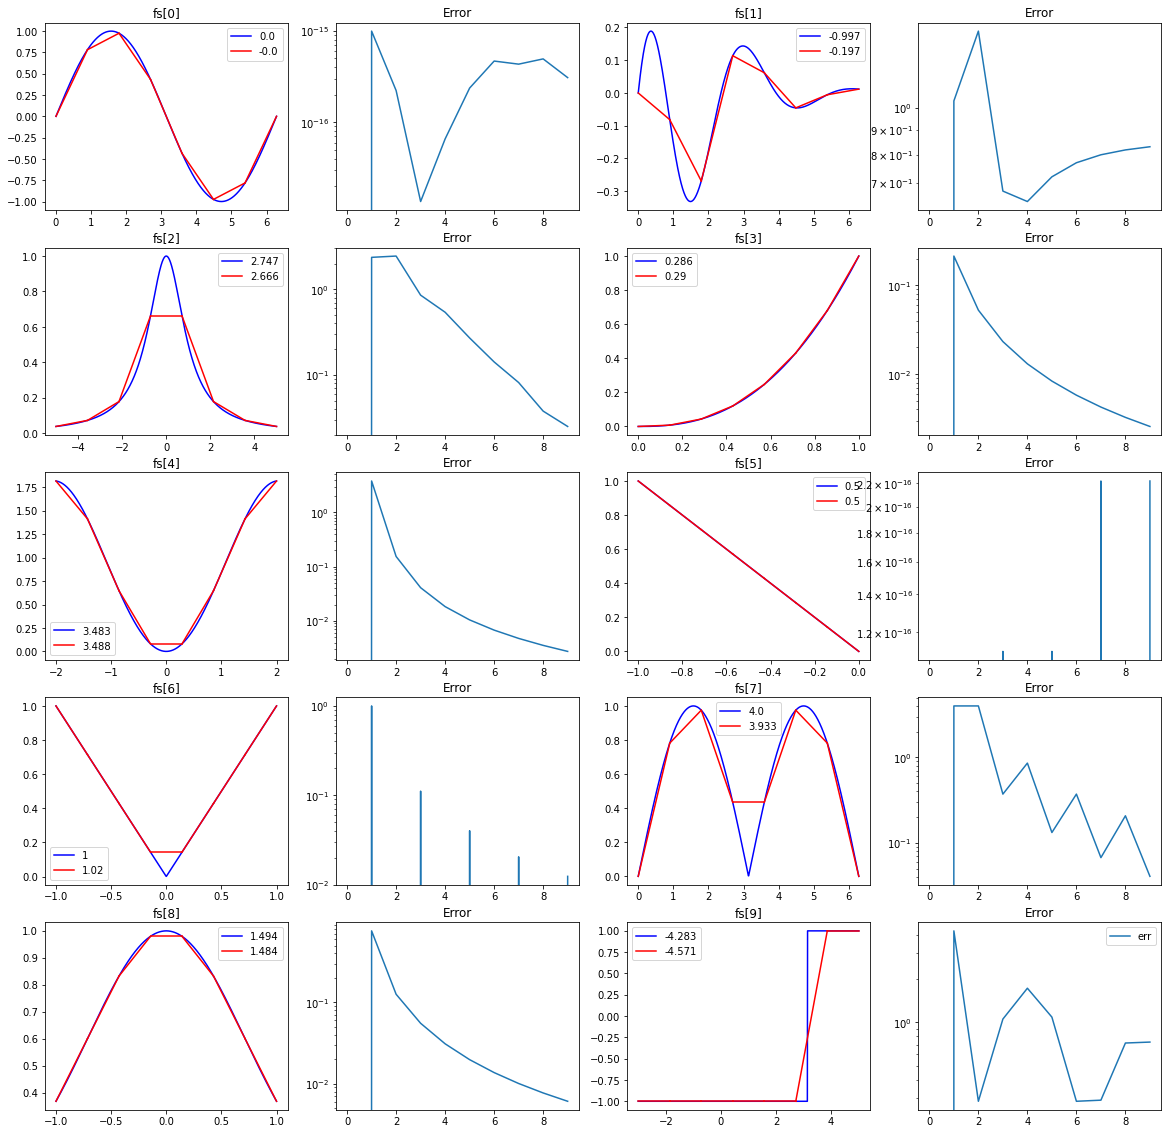

In [28]:
method = trapezoidal_rule

fig = plt.figure(figsize=(20,20))

num_fs = 2*len(fs)
num_cols = int(np.sqrt(num_fs))
num_rows = int(np.ceil(num_fs/num_cols))

for i in range(len(fs)):
    f, a, b, sol = fs[i]
    
    if not sol:
        sol = quad(f, a, b)[0]
    
    # Varing degree
    errors = [0]
    for m in range(1, 10):
        I = method(a, b, f, m=m)
        
        if m == 7:
            I = method(a, b, f, m=m, fig=fig, subplot=(num_rows, num_cols, 2*i+1), sol=sol)
            
        error = np.abs(I - sol)
        errors.append(error)
    
    ax = fig.add_subplot(num_rows, num_cols, 2*(i+1))
    ax.title.set_text('Error')
    ax.semilogy(errors, label='err')

plt.legend()    
plt.show()

### Exercise 2

In [12]:
a = 0
b = 1

f = lambda x: np.cos(x) * np.sin(x)

m = 31

print(f'E_1,{m} < 5e-4: {np.abs(trapezoidal_rule(a, b, f, m=m) - np.sin(1)**2 / 2)<5e-4}')

E_1,31 < 5e-4: True
